In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import datetime as dt

from statsmodels.tsa.stattools import adfuller
import pmdarima as pm

from tensorflow import keras
from keras import metrics, initializers
from tensorflow.keras.layers import Dropout,LSTM, GRU, BatchNormalization, Dense, Bidirectional, TimeDistributed
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
import matplotlib.image as mpimg
from sklearn.model_selection import GridSearchCV, KFold, LeaveOneOut
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasRegressor

from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


from tensorflow.keras import callbacks
from keras.callbacks import ReduceLROnPlateau

from matplotlib import style
style.use('tableau-colorblind10')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import scipy as sp
import sympy as smp
from skimage import color
from skimage import io
from scipy.fft import fftfreq
from scipy.fft import fft, ifft, fft2, ifft2

In [3]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [4]:
df = pd.read_csv('Data/bitcoin without lag.csv', parse_dates=['datetime'], index_col=['datetime'])
#df = pd.read_csv('Data/Bitcoin preprocessed.csv', index_col=['datetime'])
df.head()

,high,low,open,volumefrom,volumeto,close,hourly_volume,top_tier_volume_quote,top_tier_volume_base,top_tier_volume_total,cccagg_volume_quote,cccagg_volume_base,cccagg_volume_total,total_volume_quote,total_volume_base,total_volume_total,eth_open,eth_close,bnb_open,bnb_close,usdt_open,usdt_close,sol_open,sol_close,hourly_return,3_hourly_return,5_hourly_return,12_hourly_return,3_hourly_volatility,5_hourly_volatility,12_hourly_volatility,daily_volatility,trend_score,Pos_score,Neg_score,Compound_score,Polarity,time_of_the_day,day,day_of_month,weekend
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-07-01 00:00:00,20817.65,19647.29,19908.49,6823.65,1.381081e+08,20262.66,143641.30,1.413396e+08,1.734342e+09,1.875681e+09,1.023345e+08,1.014878e+09,1.117212e+09,1.706061e+08,1.915078e+09,2.085684e+09,1069.53,1093.82,219.48,222.58,0.9992,0.9987,33.74,34.44,354.17,1464.85,1379.49,1072.73,493.599288,460.540694,348.583077,286.091957,100.0,0.090867,0.064867,0.115550,0.0,0.0,Friday,1,0
2022-07-01 01:00:00,20444.21,20231.53,20262.66,3183.32,6.471331e+07,20380.14,64012.17,6.423249e+07,8.010797e+08,8.653122e+08,4.611965e+07,4.423495e+08,4.884692e+08,8.518715e+07,8.941570e+08,9.793442e+08,1093.82,1095.07,222.58,225.22,0.9987,0.9985,34.44,34.87,117.48,1506.73,1646.43,1531.40,476.384009,411.796784,321.143744,286.846382,113.0,0.098000,0.066744,0.034856,0.0,1.0,Friday,1,0
2022-07-01 02:00:00,20504.52,20238.04,20380.14,2262.26,4.603065e+07,20266.86,48773.36,4.844529e+07,5.490071e+08,5.974524e+08,3.446238e+07,3.276693e+08,3.621317e+08,7.538542e+07,6.256688e+08,7.010542e+08,1095.07,1091.22,225.22,225.60,0.9985,0.9982,34.87,34.77,-113.28,358.37,1469.05,1165.98,233.731269,446.529586,325.557403,287.855508,92.0,0.132773,0.042909,0.103223,0.0,2.0,Friday,1,0
2022-07-01 03:00:00,20276.63,19668.22,20266.86,3603.45,7.212081e+07,19703.32,65925.93,5.869008e+07,8.222572e+08,8.809473e+08,4.438665e+07,4.956181e+08,5.400048e+08,7.742932e+07,9.239673e+08,1.001397e+09,1091.22,1053.55,225.60,220.97,0.9982,0.9980,34.77,33.61,-563.54,-559.34,829.91,583.05,346.355426,592.302312,377.555379,310.682042,90.0,0.109960,0.044840,0.166612,0.0,3.0,Friday,1,0
2022-07-01 04:00:00,19713.40,19352.87,19703.32,3932.58,7.685356e+07,19376.97,84503.60,7.795704e+07,2.074082e+09,2.152039e+09,5.267009e+07,6.085733e+08,6.612434e+08,1.007285e+08,2.285414e+09,2.386143e+09,1053.55,1048.59,220.97,219.20,0.9980,0.9981,33.61,32.55,-326.35,-1003.17,-531.52,257.76,225.237648,360.433506,392.813183,317.146276,97.0,0.093640,0.058400,0.132120,0.0,4.0,Friday,1,0


In [5]:
df = df.drop(['Pos_score', 'Neg_score'], axis = 1)

### Feature Engineering

In [6]:
df['day'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [7]:
df['day_of_week'] = 1
for i in range(len(df.index)):
    if df['day'][i] == 'Sunday':
        df['day_of_week'][i] = 1
    elif df['day'][i] == 'Monday':
        df['day_of_week'][i] = 2
    elif df['day'][i] == 'Tuesday':
        df['day_of_week'][i] = 3
    elif df['day'][i] == 'Wednesday':
        df['day_of_week'][i] = 4
    elif df['day'][i] == 'Thursday':
        df['day_of_week'][i] = 5
    elif df['day'][i] == 'Friday':
        df['day_of_week'][i] = 6
    elif df['day'][i] == 'Saturday':
        df['day_of_week'][i] = 7

In [8]:
df.drop('day', axis = 1, inplace = True)
df['hourly_return'] = 0
for i in range(1, len(df.index)):
    df['hourly_return'][i] = df['close'][i] - df['close'][i-1]

In [9]:
df.head()

,high,low,open,volumefrom,volumeto,close,hourly_volume,top_tier_volume_quote,top_tier_volume_base,top_tier_volume_total,cccagg_volume_quote,cccagg_volume_base,cccagg_volume_total,total_volume_quote,total_volume_base,total_volume_total,eth_open,eth_close,bnb_open,bnb_close,usdt_open,usdt_close,sol_open,sol_close,hourly_return,3_hourly_return,5_hourly_return,12_hourly_return,3_hourly_volatility,5_hourly_volatility,12_hourly_volatility,daily_volatility,trend_score,Compound_score,Polarity,time_of_the_day,day_of_month,weekend,day_of_week
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-07-01 00:00:00,20817.65,19647.29,19908.49,6823.65,1.381081e+08,20262.66,143641.30,1.413396e+08,1.734342e+09,1.875681e+09,1.023345e+08,1.014878e+09,1.117212e+09,1.706061e+08,1.915078e+09,2.085684e+09,1069.53,1093.82,219.48,222.58,0.9992,0.9987,33.74,34.44,0.00,1464.85,1379.49,1072.73,493.599288,460.540694,348.583077,286.091957,100.0,0.115550,0.0,0.0,1,0,6
2022-07-01 01:00:00,20444.21,20231.53,20262.66,3183.32,6.471331e+07,20380.14,64012.17,6.423249e+07,8.010797e+08,8.653122e+08,4.611965e+07,4.423495e+08,4.884692e+08,8.518715e+07,8.941570e+08,9.793442e+08,1093.82,1095.07,222.58,225.22,0.9987,0.9985,34.44,34.87,117.48,1506.73,1646.43,1531.40,476.384009,411.796784,321.143744,286.846382,113.0,0.034856,0.0,1.0,1,0,6
2022-07-01 02:00:00,20504.52,20238.04,20380.14,2262.26,4.603065e+07,20266.86,48773.36,4.844529e+07,5.490071e+08,5.974524e+08,3.446238e+07,3.276693e+08,3.621317e+08,7.538542e+07,6.256688e+08,7.010542e+08,1095.07,1091.22,225.22,225.60,0.9985,0.9982,34.87,34.77,-113.28,358.37,1469.05,1165.98,233.731269,446.529586,325.557403,287.855508,92.0,0.103223,0.0,2.0,1,0,6
2022-07-01 03:00:00,20276.63,19668.22,20266.86,3603.45,7.212081e+07,19703.32,65925.93,5.869008e+07,8.222572e+08,8.809473e+08,4.438665e+07,4.956181e+08,5.400048e+08,7.742932e+07,9.239673e+08,1.001397e+09,1091.22,1053.55,225.60,220.97,0.9982,0.9980,34.77,33.61,-563.54,-559.34,829.91,583.05,346.355426,592.302312,377.555379,310.682042,90.0,0.166612,0.0,3.0,1,0,6
2022-07-01 04:00:00,19713.40,19352.87,19703.32,3932.58,7.685356e+07,19376.97,84503.60,7.795704e+07,2.074082e+09,2.152039e+09,5.267009e+07,6.085733e+08,6.612434e+08,1.007285e+08,2.285414e+09,2.386143e+09,1053.55,1048.59,220.97,219.20,0.9980,0.9981,33.61,32.55,-326.35,-1003.17,-531.52,257.76,225.237648,360.433506,392.813183,317.146276,97.0,0.132120,0.0,4.0,1,0,6


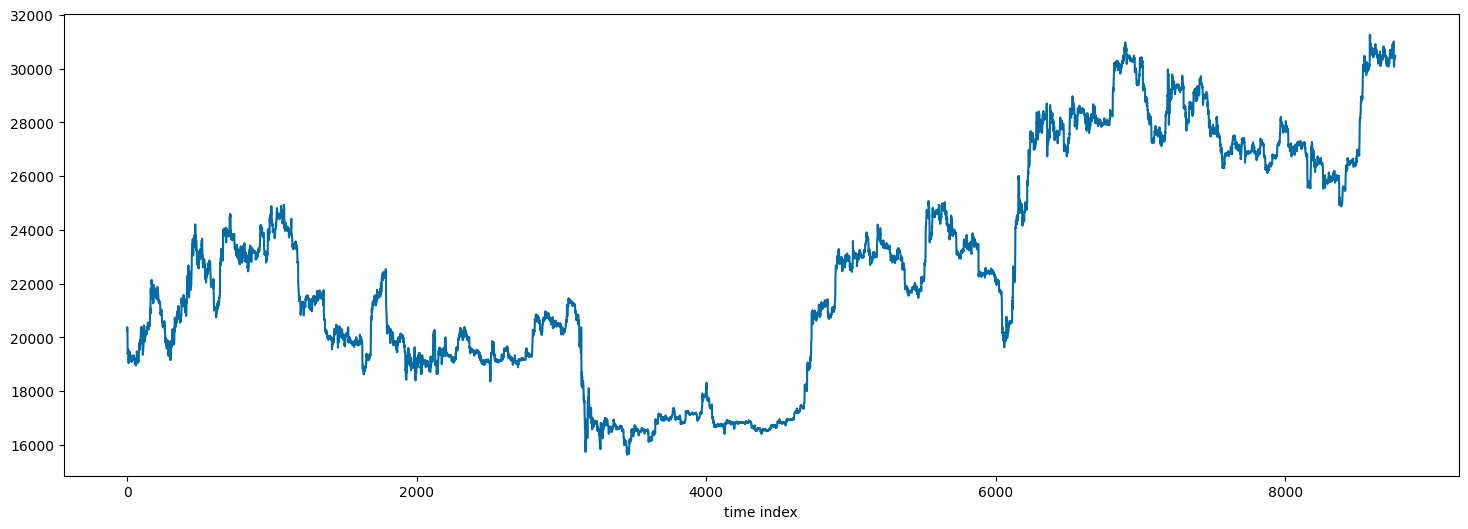

In [10]:
plt.figure(figsize=(18,6))
plt.plot(df['close'].values)
plt.xlabel('time index')
plt.show()

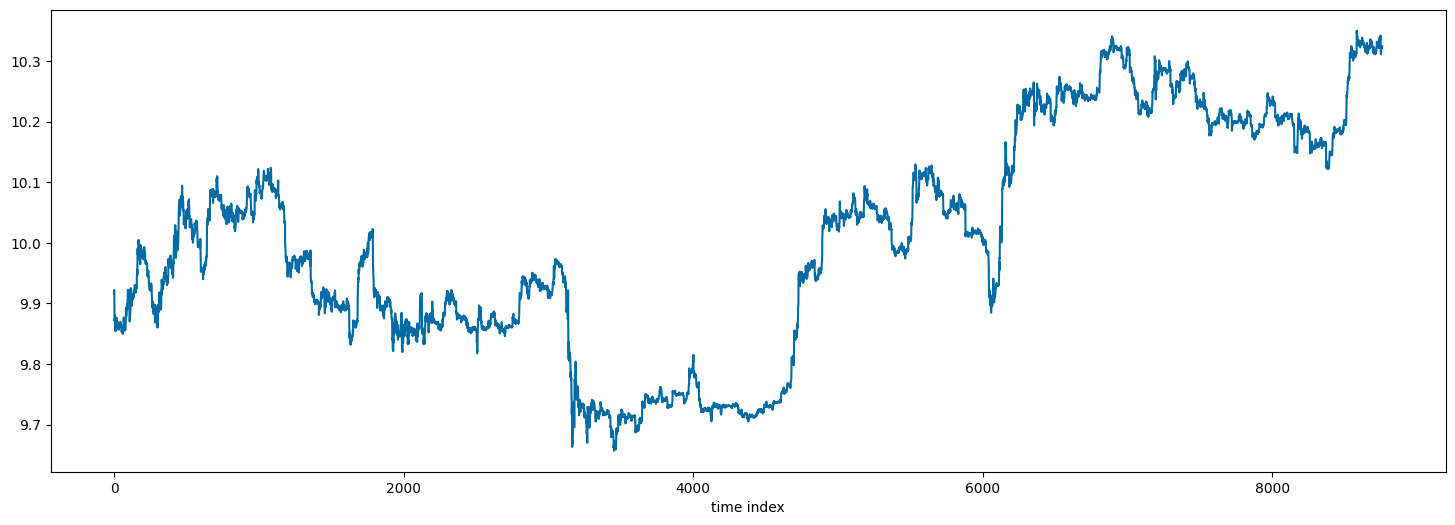

In [11]:
plt.figure(figsize=(18,6))
plt.plot(np.log(df['close'].values))
plt.xlabel('time index')
plt.show()

### Poly transform

In [83]:
# Polynomial transform
x = range(len(df.index))
y = df['close']

deg = 12
z = np.polyfit(x, y , deg)
p = np.poly1d(z)

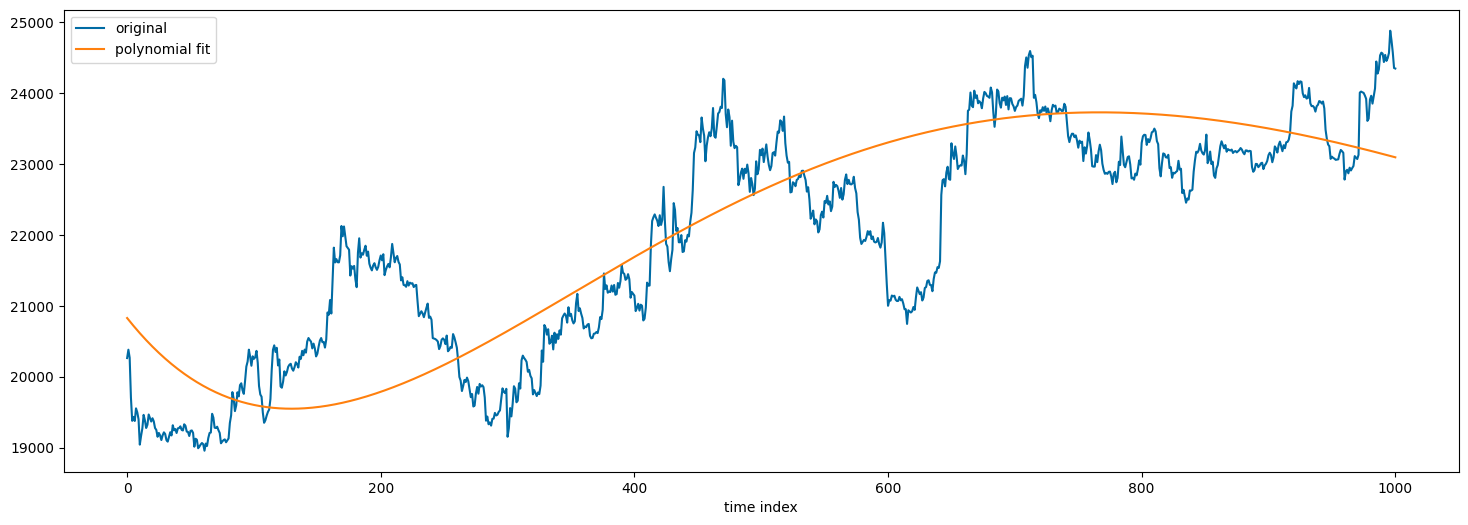

In [84]:
plt.figure(figsize=(18,6))
plt.plot(x[0:1001],y[0:1001], x[0:1001], p(x[0:1001]))
plt.legend(['original', 'polynomial fit'])
plt.xlabel('time index')
plt.show()

### Fourier Smoothing

In [19]:
# Fourier transfrom

y_fft = fft(y.to_numpy())

power = np.abs(y_fft/len(y))
y_fft[power<0.025] = 0

y_inv = ifft(y_fft)

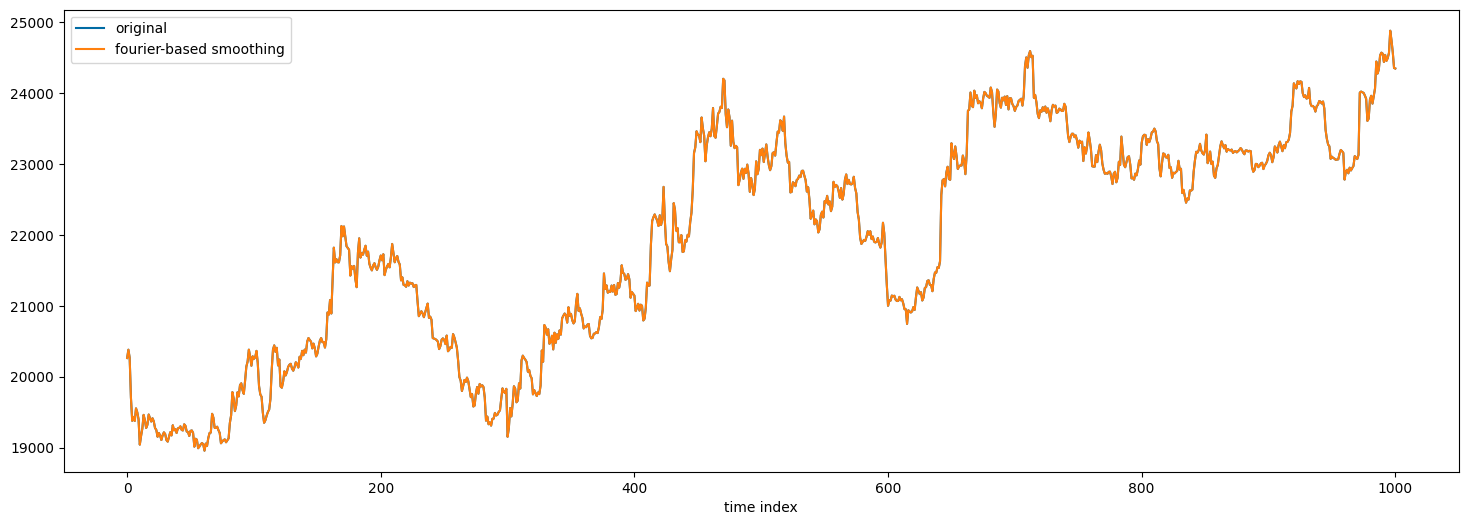

In [20]:
# plt.plot(y_inv)
plt.figure(figsize=(18,6))
plt.plot(x[0:1001],y[0:1001], x[0:1001], y_inv[0:1001])
plt.legend(['original', 'fourier-based smoothing'])
plt.xlabel('time index')
plt.show()

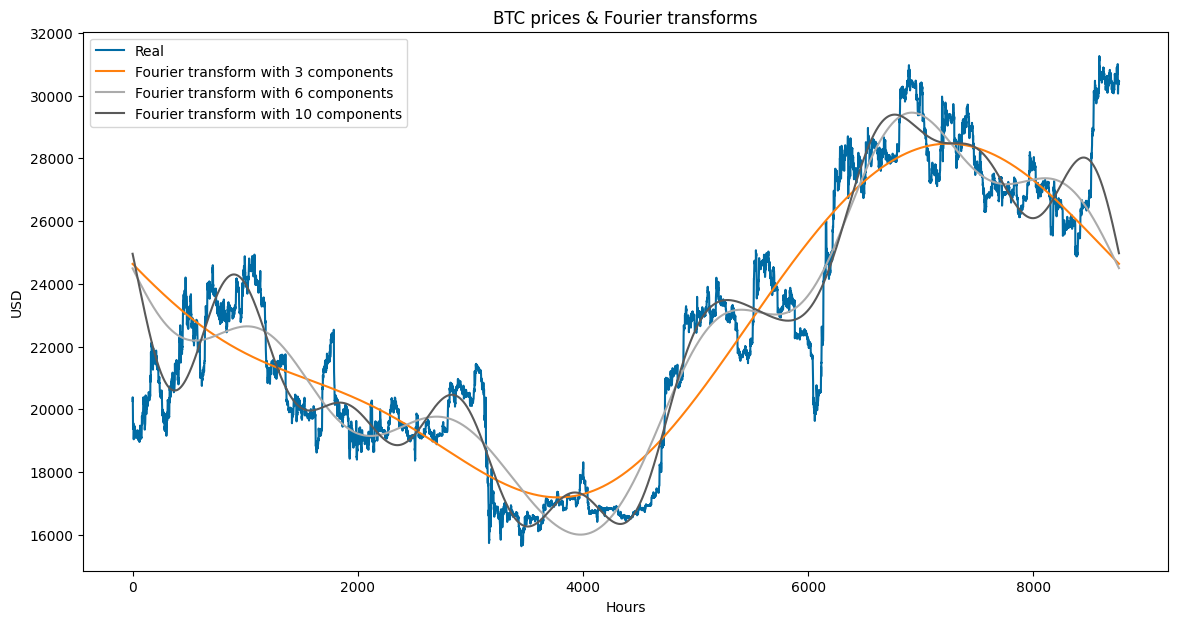

In [21]:
# Calculate the Fourier Transform
data_FT = df[['close']]
close_fft = np.fft.fft(np.asarray(data_FT['close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

# Plot the Fourier Transforms
plt.figure(figsize=(14, 7), dpi=100)
plt.plot(np.asarray(data_FT['close'].tolist()),  label='Real')
for num_ in [3, 6, 10]:
    fft_list_m10= np.copy(close_fft); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.xlabel('Hours')
plt.ylabel('USD')
plt.title('BTC prices & Fourier transforms')
plt.legend()
plt.show()

In [22]:
fft_list_m10= np.copy(close_fft); fft_list_m10[10:-10]=0

In [23]:
# df = df[['high', 'low', 'open', 'volumefrom', 'volumeto', 'close', 'hourly_volume', 'hourly_return',
#          '3_hourly_volatility', '5_hourly_volatility', '12_hourly_volatility', 'daily_volatility', 'trend_score', 'Compound_score', 
#          'Polarity', 'time_of_the_day', 'weekend', 'day_of_week']]

df = df.drop(['top_tier_volume_quote', 'top_tier_volume_base', 'top_tier_volume_total', 'cccagg_volume_quote',
              'cccagg_volume_base', 'cccagg_volume_total', 'total_volume_quote', 'total_volume_base', 'total_volume_total'],
             axis = 1)

In [24]:
fourier_train = df.iloc[:len(df.index) - (500)]
fourier_test = df.iloc[len(df.index) - 500:]

In [25]:
train_fft = np.fft.fft(np.asarray(fourier_train['close'].tolist()))
test_fft = np.fft.fft(np.asarray(fourier_test['close'].tolist()))

In [26]:
train_fft_list_= np.copy(train_fft)
test_fft_list_= np.copy(test_fft)

# series with 3 components
train_fft_list_[3:-3] = 0
test_fft_list_[3:-3] = 0
fourier_train['fft3'] = train_fft_list_.real.astype(np.float32)
fourier_test['fft3'] = test_fft_list_.real.astype(np.float32)

# series with 10 components
train_fft_list_= np.copy(train_fft)
test_fft_list_= np.copy(test_fft)
train_fft_list_[10:-10] = 0
test_fft_list_[10:-10] = 0
fourier_train['fft10'] = train_fft_list_.real.astype(np.float32)
fourier_test['fft10'] = test_fft_list_.real.astype(np.float32)

### Predict using fast fourier transform

In [30]:
wave_train = df['close'][:len(df.index) - 500].values
wave_test = df['close'][len(df.index) - 500:].values

In [171]:
def construct_fft(yvalues, deg_polyfit=12, real_abs_only=True):
    N = len(yvalues)
    xvalues = np.arange(N)
    
    # we calculate the trendline and detrended signal with polyfit
    z2 = np.polyfit(xvalues, yvalues, deg_polyfit)
    p2 = np.poly1d(z2)
    yvalues_trend = p2(xvalues)
    yvalues_detrended = yvalues - yvalues_trend
    
    # The fourier transform and the corresponding frequencies
    fft_y = np.fft.fft(yvalues_detrended)
    fft_x = np.fft.fftfreq(N)
    if real_abs_only:
        fft_x = fft_x[:len(fft_x)//2]
        fft_y = np.abs(fft_y[:len(fft_y)//2])
    return fft_x, fft_y, p2

def get_integer_no_of_periods(yvalues, fft_x, fft_y, frac=1.0, mph=0.4):
    N = len(yvalues)
    fft_y_real = np.abs(fft_y[:len(fft_y)//2])
    fft_x_real = fft_x[:len(fft_x)//2]
    
    mph = np.nanmax(fft_y_real)*mph
    indices_peaks = detect_peaks(fft_y_real, mph=mph)
    peak_fft_x = fft_x_real[indices_peaks]
    main_peak_x = peak_fft_x[0]
    T = int(1/main_peak_x)
    
    no_integer_periods_all = N//T
    no_integer_periods_frac = int(frac*no_integer_periods_all)
    no_samples = T*no_integer_periods_frac
    
    yvalues_ = yvalues[-no_samples:]
    xvalues_ = np.arange(len(yvalues))
    return xvalues_, yvalues_

def restore_signal_from_fft(fft_x, fft_y, N, extrapolate_with, frac_harmonics):
    xvalues_full = np.arange(0, N + extrapolate_with)
    restored_sig = np.zeros(N + extrapolate_with)
    indices = list(range(N))
    
    # The number of harmonics we want to include in the reconstruction
    indices.sort(key = lambda i: np.absolute(fft_x[i]))
    max_no_harmonics = len(fft_y)
    no_harmonics = int(frac_harmonics*max_no_harmonics)
        
    for i in indices[:1 + no_harmonics * 2]:
        ampli = np.absolute(fft_y[i]) / N
        phase = np.angle(fft_y[i])
        restored_sig += ampli * np.cos(2 * np.pi * fft_x[i] * xvalues_full + phase)
    # return the restored signal plus the previously calculated trend
    return restored_sig

def reconstruct_from_fft(yvalues, 
                         frac_harmonics=1.0, 
                         deg_polyfit=2, 
                         extrapolate_with=0, 
                         fraction_signal = 1.0,
                         mph = 0.4):
    N_original = len(yvalues)
    fft_x, fft_y, p2 = construct_fft(yvalues, deg_polyfit, real_abs_only=False)
    xvalues, yvalues = get_integer_no_of_periods(yvalues, fft_x, fft_y, frac=fraction_signal, mph=mph)
    fft_x, fft_y, p2 = construct_fft(yvalues, deg_polyfit, real_abs_only=False)
    N = len(yvalues)

    xvalues_full = np.arange(0, N + extrapolate_with)
    restored_sig = restore_signal_from_fft(fft_x, fft_y, N, extrapolate_with, frac_harmonics)
    restored_sig = restored_sig + p2(xvalues_full)
    return restored_sig[-extrapolate_with:]

In [167]:
from siml.detect_peaks import *

def plot_yvalues(ax, xvalues, yvalues, plot_original=True, polydeg=2):
    z2 = np.polyfit(xvalues, yvalues, polydeg)
    p2 = np.poly1d(z2)
    yvalues_trend = p2(xvalues)
    yvalues_detrended = yvalues - yvalues_trend
    ax.plot(xvalues, yvalues_detrended,  color='green', label='detrended')
    ax.plot(xvalues, yvalues_trend, linestyle='--', color='k', label='trend')
    if plot_original:
        ax.plot(xvalues, yvalues, color='skyblue',label='original')
    ax.legend(loc='upper left', bbox_to_anchor=(-0.09, 1.078),framealpha=1)
    ax.set_yticks([])
    return yvalues_detrended
 
def plot_fft_psd(ax, yvalues_detrended, plot_psd=True, annotate_peaks=True, max_peak=0.5):
    #assert max_peak & gt; 0 and max_peak & lt; 1, "max_peak should be between 0 and 1"
    fft_x_ = np.fft.fftfreq(len(yvalues_detrended))
    fft_y_  = np.fft.fft(yvalues_detrended);
    fft_x = fft_x_[:len(fft_x_)//2]
    fft_y = np.abs(fft_y_[:len(fft_y_)//2])
    psd_x, psd_y = welch(yvalues_detrended)
    mph = np.nanmax(fft_y)*max_peak
    indices_peaks = detect_peaks(fft_y, mph=mph)
    peak_fft_x, peak_fft_y = fft_x[indices_peaks], fft_y[indices_peaks]
    ax.plot(fft_x, fft_y, label='FFT')
    if plot_psd:
        axb = ax.twinx()
        axb.plot(psd_x, psd_y, color='red',linestyle='--', label='PSD')
    if annotate_peaks:
        for ii in range(len(indices_peaks)):
            x, y = peak_fft_x[ii], peak_fft_y[ii]
            T = 1/x
            text = "  f = {:.2f}\n  T = {:.2f}".format(x,T)
            ax.annotate(text, (x,y),va='top')
    lines, labels = ax.get_legend_handles_labels()
    linesb, labelsb = axb.get_legend_handles_labels()
    ax.legend(lines + linesb, labels + labelsb, loc='upper left')
    ax.set_yticks([])
    axb.set_yticks([])
    return fft_x_, fft_y_

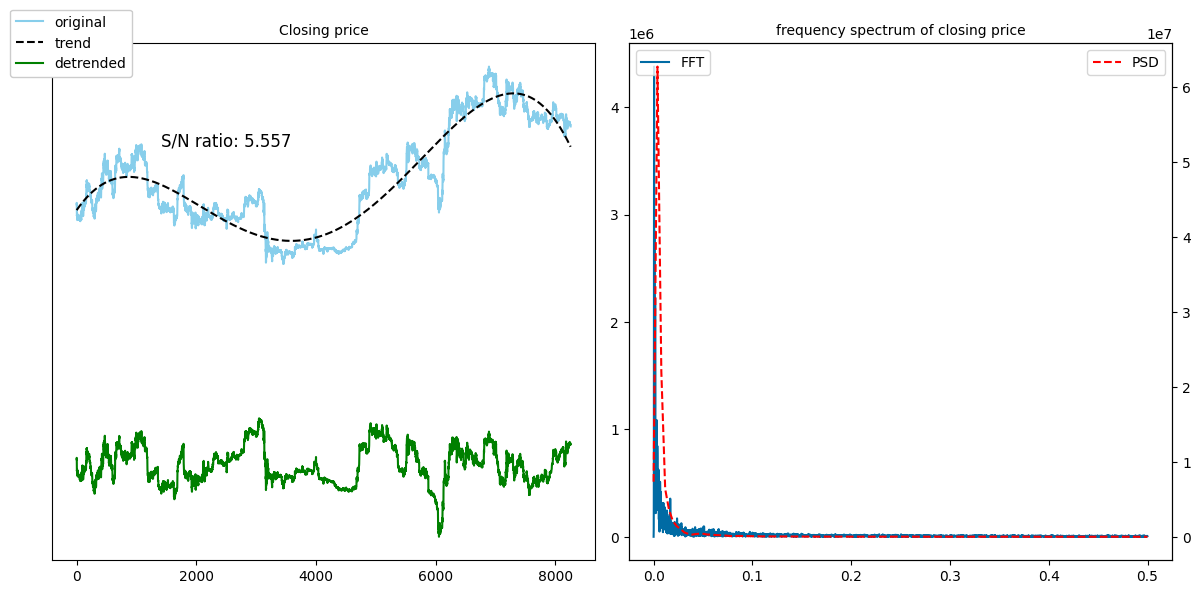

In [119]:
from scipy.signal import welch

def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

fig, axarr = plt.subplots(figsize=(12,6), nrows=1, ncols=2)

yvalues = df['close'][:len(df.index) - 500].values
xvalues = np.arange(len(yvalues))

z_fitted = np.polyfit(xvalues, yvalues, 4)
p1_fitted = np.poly1d(z_fitted)
yvalues_trend = p1_fitted(xvalues)
yvalues_detrended = yvalues - yvalues_trend

fft_x_ = np.fft.fftfreq(len(yvalues_detrended))
fft_y_  = np.fft.fft(yvalues_detrended);
fft_x = fft_x_[:len(fft_x_)//2]
fft_y = np.abs(fft_y_[:len(fft_y_)//2])

psd_x, psd_y = welch(yvalues_detrended)
snr = signaltonoise(yvalues)

axarr[0].plot(xvalues, yvalues, color='skyblue',label='original')
axarr[0].plot(xvalues, yvalues_trend, linestyle='--', color='k', label='trend')
axarr[0].plot(xvalues, yvalues_detrended,  color='green', label='detrended')
axarr[1].plot(fft_x, fft_y, label='FFT')
axb = axarr[1].twinx()
axb.plot(psd_x, psd_y, color='red',linestyle='--', label='PSD')
axarr[0].set_title('Closing price',fontsize=10)
axarr[0].annotate("S/N ratio: {:.3f}".format(snr), (0.2,0.8),xycoords='axes fraction', fontsize=12)
axarr[1].set_title('frequency spectrum of {}'.format('closing price'),fontsize=10)
axarr[0].legend(loc='upper left', bbox_to_anchor=(-0.09, 1.078),framealpha=1)
axarr[0].set_yticks([])
axarr[1].legend(loc='upper left')
axb.legend(loc='upper right')

plt.tight_layout()
plt.show()

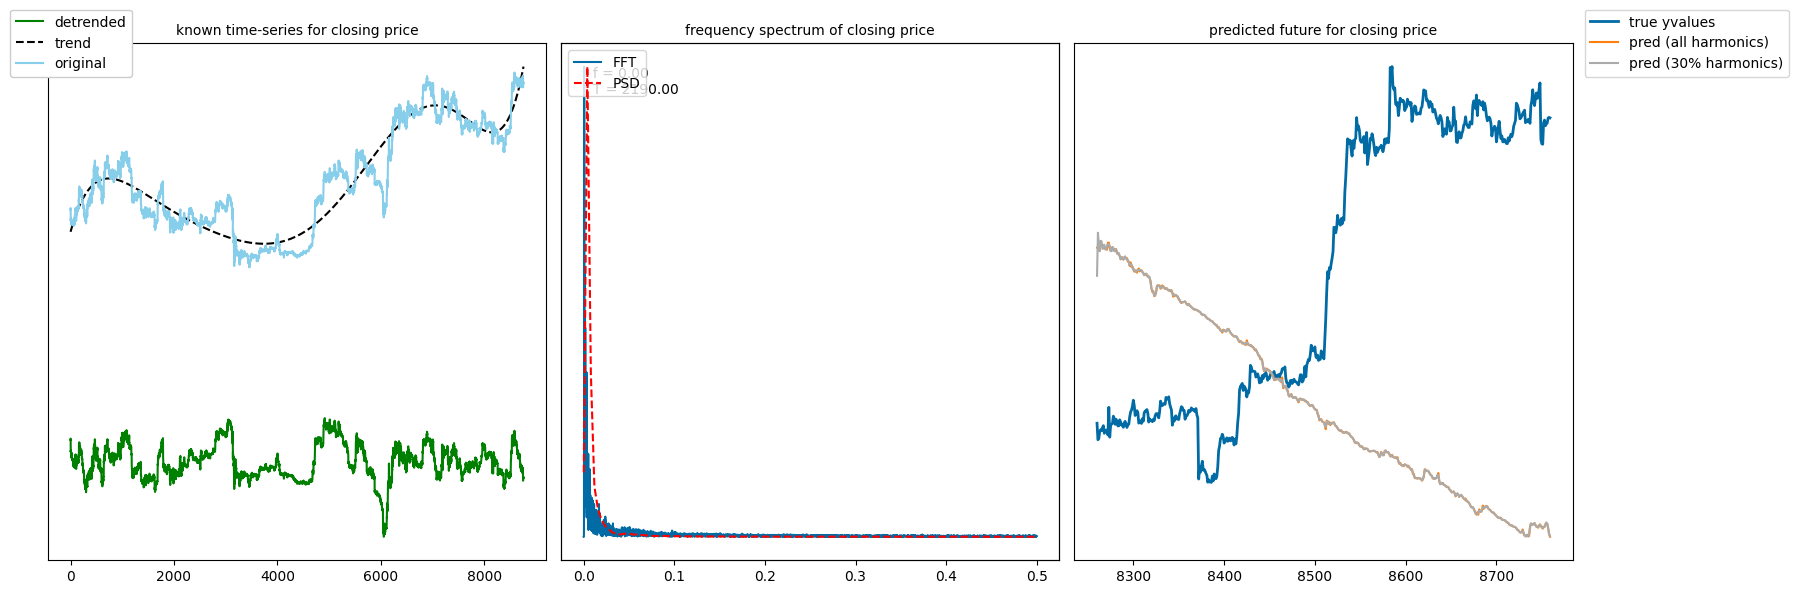

In [178]:
N = len(df.index) - 500
nrows = 1
frac_harmonics = 0.3
fraction_signal = 0.8
max_peak = 0.8
ycol = 'Value'
axtitle = 'desc {}'
fig, axarr = plt.subplots(figsize=(18,6), ncols=3, nrows=nrows)
yvalues_full = df['close'].values
xvalues_full = np.arange(len(yvalues_full))
yvalues_known = yvalues_full[:N]
xvalues_known = np.arange(len(yvalues_known))
yvalues_future = yvalues_full[N:]
xvalues_future = np.arange(N, len(xvalues_full))
N_extrapolation = len(yvalues_future)

yvalues_detrended = plot_yvalues(axarr[0], xvalues_full, yvalues_full, plot_original=True, polydeg=7)
fft_x_, fft_y_ = plot_fft_psd(axarr[1], yvalues_detrended, plot_psd=True, max_peak=max_peak)

yvalues_predicted1 = reconstruct_from_fft(yvalues_known, extrapolate_with=N_extrapolation, fraction_signal=fraction_signal)
yvalues_predicted2 = reconstruct_from_fft(yvalues_known, extrapolate_with=N_extrapolation, fraction_signal=fraction_signal, frac_harmonics=frac_harmonics)

axarr[2].plot(xvalues_future, yvalues_future, label='true yvalues', linewidth=2)
axarr[2].plot(xvalues_future, yvalues_predicted1, label='pred (all harmonics)')
axarr[2].plot(xvalues_future, yvalues_predicted2, label='pred (30% harmonics)')

axarr[0].set_title('known time-series for {}'.format('closing price'),fontsize=10)
axarr[1].set_title('frequency spectrum of {}'.format('closing price'),fontsize=10)
axarr[2].set_title('predicted future for {}'.format('closing price'),fontsize=10)
axarr[2].set_yticks([])
axarr[2].legend(loc='upper left', bbox_to_anchor=(1.01, 1.078))
plt.tight_layout()
plt.show()
plt.close()

### Wavelet transform

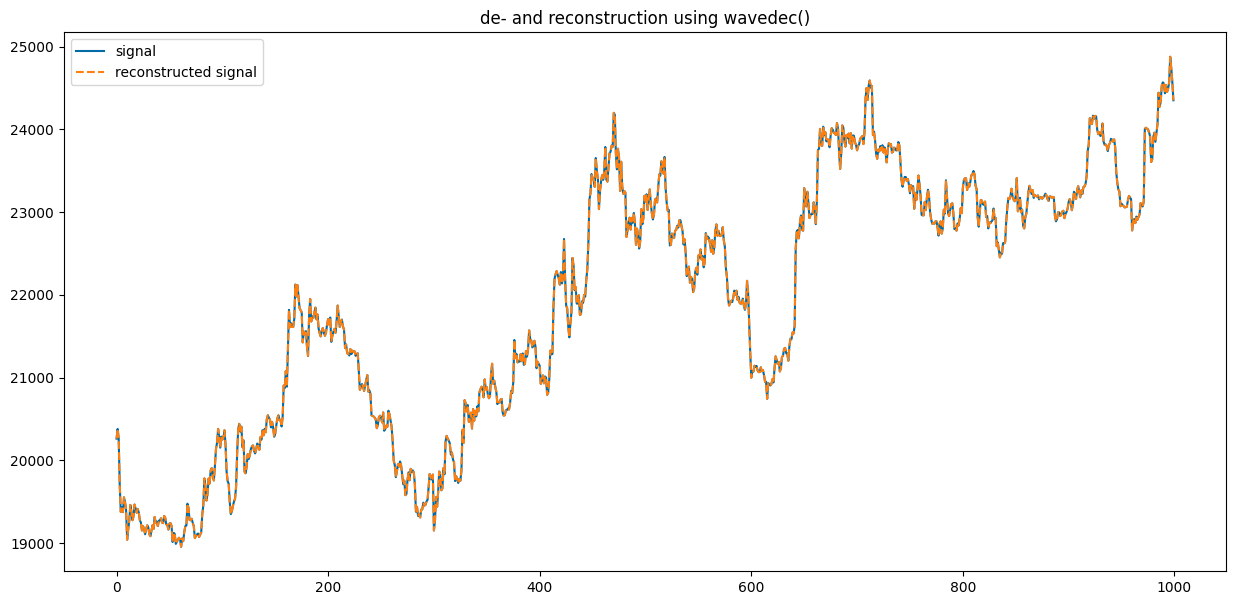

In [139]:
import pywt
coeffs = pywt.wavedec(df['close'].values, 'db2', level=8)
reconstructed_signal = pywt.waverec(coeffs, 'db2')

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(df['close'].values[:1000], label='signal')
ax.plot(reconstructed_signal[:1000], label='reconstructed signal', linestyle='--')
ax.legend(loc='upper left')
ax.set_title('de- and reconstruction using wavedec()')
plt.show()

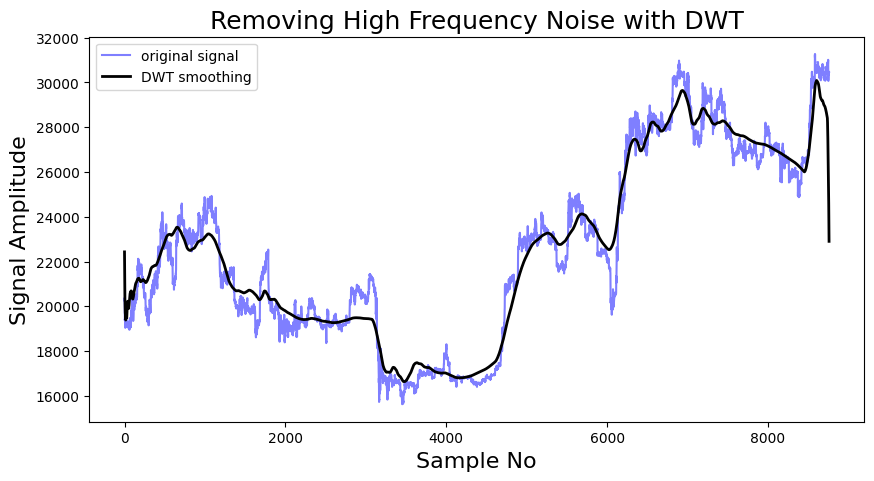

In [184]:
def lowpassfilter(signal = df['close'].values, thresh = 0.4, wavelet="db4"):
    thresh = thresh*np.nanmax(df['close'].values)
    coeff = pywt.wavedec(signal, wavelet, mode="per" )
    coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
    return reconstructed_signal
 
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df['close'].values, color="b", alpha=0.5, label='original signal')
rec = lowpassfilter(df['close'].values, 0.3)
ax.plot(rec, 'k', label='DWT smoothing', linewidth=2)
ax.legend()
ax.set_title('Removing High Frequency Noise with DWT', fontsize=18)
ax.set_ylabel('Signal Amplitude', fontsize=16)
ax.set_xlabel('Sample No', fontsize=16)
plt.show()

In [187]:
len(rec)s

8760

In [193]:
len(y)

500

In [194]:
from scipy import interpolate

x = np.arange(0, len(rec) - 500)
y = rec[ : len(rec) - 500]
f = interpolate.interp1d(x, y, fill_value='extrapolate')

In [206]:
extrapolated = []
for i in range(500):
    val = float(f(i))
    extrapolated.append(val)

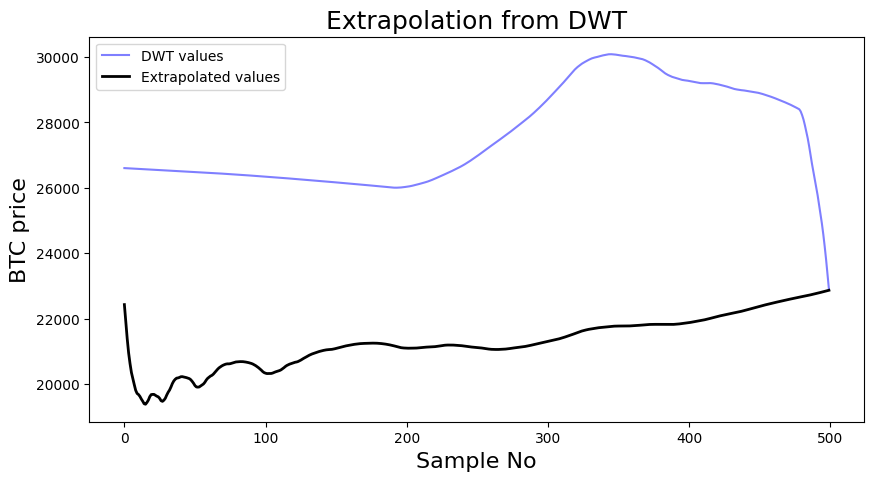

In [210]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(rec[len(rec) - 500 : ], color="b", alpha=0.5, label='DWT values')
ax.plot(extrapolated, 'k', label='Extrapolated values', linewidth=2)
ax.legend()
ax.set_title('Extrapolation from DWT', fontsize=18)
ax.set_ylabel('BTC price', fontsize=16)
ax.set_xlabel('Sample No', fontsize=16)
plt.show()

#### Exponential smoothing

In [14]:
# MAPE
import statistics
from sklearn.metrics import mean_squared_error, r2_score

def MAPE(actual, pred):
    assert len(actual) == len(pred), "Input arrays must have the same length."
    error_ = []
    for ii in range(len(actual)):
        absolute_errors = abs((actual[ii] - pred[ii]) / actual[ii])
        error_.append(absolute_errors)
    
    mape = (sum(error_)/len(error_)) * 100.0

    return mape

def rmse(actual, pred):
    return np.sqrt(mean_squared_error(actual, pred))

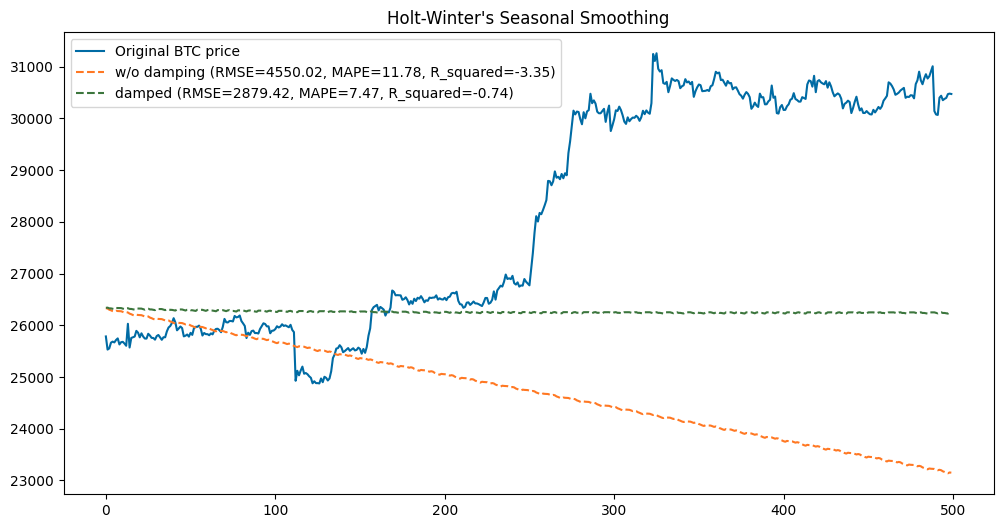

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import r2_score

train = df.iloc[:len(df.index) - (500)]
test = df.iloc[len(df.index) - 500:]

train = train['close']
test = test['close']

model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12)
model2 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12, damped=True)
fit = model.fit()
pred = fit.forecast(500)
fit2 = model2.fit()
pred2 = fit2.forecast(500)

sse1 = np.sqrt(np.mean(np.square(test.values - pred.values)))
sse2 = np.sqrt(np.mean(np.square(test.values - pred2.values)))

r1 = r2_score(test.values, pred.values)
r2 = r2_score(test.values, pred2.values)

mape1 = MAPE(test.values, pred.values)
mape2 = MAPE(test.values, pred2.values)

fig, ax = plt.subplots(figsize=(12, 6))
#ax.plot(train.index[60:], train.values[60:]);
ax.plot(test.values, label='Original BTC price');
ax.plot(pred.values, linestyle='--', color='#ff7823', label="w/o damping (RMSE={:0.2f}, MAPE={:0.2f}, R_squared={:0.2f})".format(sse1, mape1, r1));
ax.plot(pred2.values, linestyle='--', color='#3c763d', label="damped (RMSE={:0.2f}, MAPE={:0.2f}, R_squared={:0.2f})".format(sse2, mape2, r2)); 
ax.legend();
ax.set_title("Holt-Winter's Seasonal Smoothing");

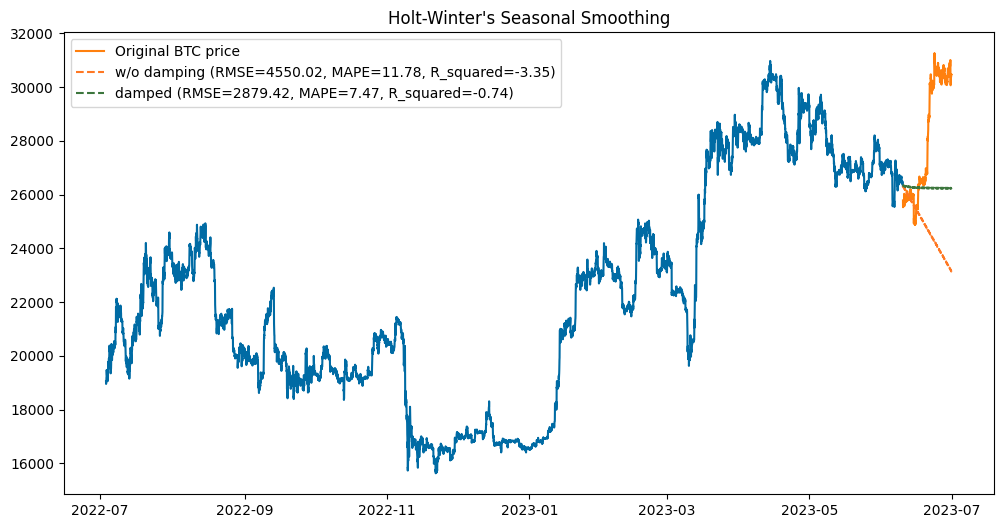

In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import r2_score

train = df.iloc[:len(df.index) - (500)]
test = df.iloc[len(df.index) - 500:]

train = train['close']
test = test['close']

model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12)
model2 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12, damped=True)
fit = model.fit()
pred = fit.forecast(500)
fit2 = model2.fit()
pred2 = fit2.forecast(500)

sse1 = np.sqrt(np.mean(np.square(test.values - pred.values)))
sse2 = np.sqrt(np.mean(np.square(test.values - pred2.values)))

r1 = r2_score(test.values, pred.values)
r2 = r2_score(test.values, pred2.values)

mape1 = MAPE(test.values, pred.values)
mape2 = MAPE(test.values, pred2.values)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index[60:], train.values[60:]);
ax.plot(test.index, test.values, label='Original BTC price');
ax.plot(test.index, pred, linestyle='--', color='#ff7823', label="w/o damping (RMSE={:0.2f}, MAPE={:0.2f}, R_squared={:0.2f})".format(sse1, mape1, r1));
ax.plot(test.index, pred2, linestyle='--', color='#3c763d', label="damped (RMSE={:0.2f}, MAPE={:0.2f}, R_squared={:0.2f})".format(sse2, mape2, r2)); 
ax.legend();
ax.set_title("Holt-Winter's Seasonal Smoothing");